<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-05-03 07:29:35--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-05-03 07:29:35 (48.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
data = pd.read_csv('moore.csv',header=None).values
#data
x = data[:,0].reshape(-1,1)
y = data[:,1]

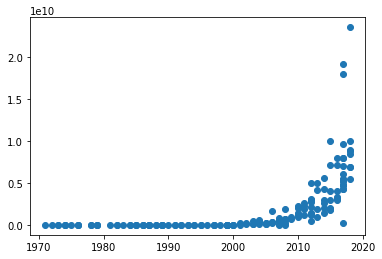

In [27]:
plt.scatter(x,y)

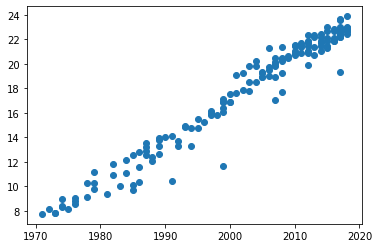

In [28]:
y = np.log(y)
plt.scatter(x,y)

In [0]:
x = x - x.mean()

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])


model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9), #(learning_rate, momentum)
    loss = 'mse'
    )

#learning rate scheduler
def schedule(epoch, lr):
  if epoch>50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(x, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 411.5028 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 318.3535 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 310.2687 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 504.2361 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 288.8041 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 229.6996 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 151.6173 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 183.8214 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 68.7593 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 46.0027 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss:

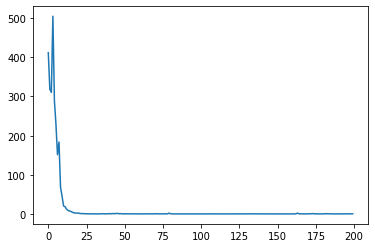

In [36]:
plt.plot(r.history['loss'], label="loss")

In [37]:
print(model.layers,"\n")
print(model.layers[0].get_weights()) #slope 


[array([[0.3315263]], dtype=float32), array([17.771399], dtype=float32)]


In [39]:
slope = model.layers[0].get_weights()[0][0,0]
slope

0.3315263

In [40]:
print("Time to double: ", np.log(slope) / 2)

Time to double:  -0.5520240664482117
